<a href="https://colab.research.google.com/github/karthik-sai1/Used-Car-Price-Prediction-Using-ML-Techniques/blob/main/Car_dekho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [ ]:
data_bangalore = pd.read_excel('bangalore_cars.xlsx')
data_bangalore.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [ ]:
data_bangalore['new_car_detail'][0]

"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 3, 'owner': '3rd Owner', 'oem': 'Maruti', 'model': 'Maruti Celerio', 'modelYear': 2015, 'centralVariantId': 3979, 'variantName': 'VXI', 'price': '₹ 4 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [ ]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []

for i in range(data_bangalore.shape[0]):
    new_car_detail = data_bangalore['new_car_detail'][i]
    new_car_overview = data_bangalore['new_car_overview'][i]
    new_car_specs = data_bangalore['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_bangalore['Fuel_Type'] = fuel_type
data_bangalore['Kilometers_Driven'] = Kilometers_driven
data_bangalore['Transmission_Type'] = Transmission_type
data_bangalore['No_of_Owners'] = No_of_owners
data_bangalore['Manufactured_By'] = Original_Equipment_Manufacturer
data_bangalore['Car_Model'] = model
data_bangalore['Car_Produced_Year'] = model_Year
data_bangalore['Car_Price'] = Price
data_bangalore['Registration_Year'] = registration_year
data_bangalore['No_of_Seats'] = seats
data_bangalore['Engine_CC'] = engine_cc
data_bangalore['Mileage(kmpl)'] = Mileage

In [ ]:
data_bangalore.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,400000.0,2015,5,998,23.1
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"32,706",Manual,2,Ford,Ford Ecosport,2018,811000.0,2018,5,1497,17
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"11,949",Manual,1,Tata,Tata Tiago,2018,585000.0,2018,5,1199,23.84
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,2014,5,1197,19.1
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,2015,5,1248,23.65


In [ ]:
data_bangalore['Location'] = 'Bangalore'

In [ ]:
data_chennai = pd.read_excel('chennai_cars.xlsx')
data_chennai.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ..."
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ..."


In [ ]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_chennai.shape[0]):
    new_car_detail = data_chennai['new_car_detail'][i]
    new_car_overview = data_chennai['new_car_overview'][i]
    new_car_specs = data_chennai['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)


    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_chennai['Fuel_Type'] = fuel_type
data_chennai['Kilometers_Driven'] = Kilometers_driven
data_chennai['Transmission_Type'] = Transmission_type
data_chennai['No_of_Owners'] = No_of_owners
data_chennai['Manufactured_By'] = Original_Equipment_Manufacturer
data_chennai['Car_Model'] = model
data_chennai['Car_Produced_Year'] = model_Year
data_chennai['Car_Price'] = Price
data_chennai['Registration_Year'] = registration_year
data_chennai['No_of_Seats'] = seats
data_chennai['Engine_CC'] = engine_cc
data_chennai['Mileage(kmpl)'] = Mileage

In [ ]:
data_chennai.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"20,000",Automatic,1,Kia,Kia Sonet,2022,1150000.0,2022,5,998,9
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"20,687",Manual,1,Maruti,Maruti Eeco,2015,415000.0,2015,7,1196,15.37
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"30,000",Manual,1,Nissan,Nissan Magnite,2021,750000.0,2021,5,999,20
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"59,247",Manual,1,Hyundai,Hyundai i10,2015,398000.0,2015,5,1086,19.81
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",Petrol,"50,000",Manual,1,Honda,Honda Jazz,2015,550000.0,2015,5,1199,18.7


In [ ]:
data_chennai['Location'] = 'Chennai'

In [ ]:
data_delhi = pd.read_excel('delhi_cars.xlsx')
data_delhi.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [ ]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_delhi.shape[0]):
    new_car_detail = data_delhi['new_car_detail'][i]
    new_car_overview = data_delhi['new_car_overview'][i]
    new_car_specs = data_delhi['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_delhi['Fuel_Type'] = fuel_type
data_delhi['Kilometers_Driven'] = Kilometers_driven
data_delhi['Transmission_Type'] = Transmission_type
data_delhi['No_of_Owners'] = No_of_owners
data_delhi['Manufactured_By'] = Original_Equipment_Manufacturer
data_delhi['Car_Model'] = model
data_delhi['Car_Produced_Year'] = model_Year
data_delhi['Car_Price'] = Price
data_delhi['Registration_Year'] = registration_year
data_delhi['No_of_Seats'] = seats
data_delhi['Engine_CC'] = engine_cc
data_delhi['Mileage(kmpl)'] = Mileage

In [ ]:
data_delhi.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"10,000",Automatic,1,Kia,Kia Seltos,2022,1900000.0,2022,5,1493,18
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"57,437",Manual,2,Hyundai,Hyundai Creta,2016,762000.0,2016,5,1591,15.29
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"8,000",Automatic,1,Mercedes-Benz,Mercedes-Benz GLC,2020,5600000.0,2020,5,1991,12.74
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"28,151",Manual,2,Maruti,Maruti Swift,2018,523000.0,2019,5,1197,22.38
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Manual,1,Hyundai,Hyundai Creta,2017,765000.0,2017,5,1591,15.29


In [ ]:
data_delhi['Location'] = 'delhi'

In [ ]:
data_hyderabad = pd.read_excel('/content/hyderabad_cars.xlsx')
data_hyderabad.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [ ]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_hyderabad.shape[0]):
    new_car_detail = data_hyderabad['new_car_detail'][i]
    new_car_overview = data_hyderabad['new_car_overview'][i]
    new_car_specs = data_hyderabad['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_hyderabad['Fuel_Type'] = fuel_type
data_hyderabad['Kilometers_Driven'] = Kilometers_driven
data_hyderabad['Transmission_Type'] = Transmission_type
data_hyderabad['No_of_Owners'] = No_of_owners
data_hyderabad['Manufactured_By'] = Original_Equipment_Manufacturer
data_hyderabad['Car_Model'] = model
data_hyderabad['Car_Produced_Year'] = model_Year
data_hyderabad['Car_Price'] = Price
data_hyderabad['Registration_Year'] = registration_year
data_hyderabad['No_of_Seats'] = seats
data_hyderabad['Engine_CC'] = engine_cc
data_hyderabad['Mileage(kmpl)'] = Mileage

In [ ]:
data_hyderabad.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Automatic,1,Volkswagen,Volkswagen Polo,2022,1044000.0,2022,5,999,16.47
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"85,582",Manual,2,Hyundai,Hyundai EON,2014,260000.0,2014,5,814,21.1
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"10,000",Manual,1,Hyundai,Hyundai Venue,2023,955000.0,2023,5,1197,11
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"50,750",Manual,1,Maruti,Maruti Baleno,2017,671000.0,2017,5,1197,21.4
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"10,000",Automatic,1,Mahindra,Mahindra Thar,2022,1900000.0,2022,4,1997,19


In [ ]:
data_hyderabad['Location'] = 'Hyderabad'

In [ ]:
data_jaipur = pd.read_excel('jaipur_cars.xlsx')
data_jaipur.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [ ]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_jaipur.shape[0]):
    new_car_detail = data_jaipur['new_car_detail'][i]
    new_car_overview = data_jaipur['new_car_overview'][i]
    new_car_specs = data_jaipur['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_jaipur['Fuel_Type'] = fuel_type
data_jaipur['Kilometers_Driven'] = Kilometers_driven
data_jaipur['Transmission_Type'] = Transmission_type
data_jaipur['No_of_Owners'] = No_of_owners
data_jaipur['Manufactured_By'] = Original_Equipment_Manufacturer
data_jaipur['Car_Model'] = model
data_jaipur['Car_Produced_Year'] = model_Year
data_jaipur['Car_Price'] = Price
data_jaipur['Registration_Year'] = registration_year
data_jaipur['No_of_Seats'] = seats
data_jaipur['Engine_CC'] = engine_cc
data_jaipur['Mileage(kmpl)'] = Mileage

In [ ]:
data_jaipur.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"1,20,000",Manual,2,Hyundai,Hyundai i20,2015,510000.0,2015,5,1396,22.54
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"66,951",Manual,1,Maruti,Maruti Swift,2012,381000.0,2012,5,1197,22.38
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"80,000",Automatic,2,Maruti,Maruti Celerio,2016,320000.0,2016,5,998,23.1
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"44,392",Manual,1,Hyundai,Hyundai Grand i10,2017,420000.0,2017,5,1197,18.9
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"40,000",Automatic,1,Maruti,Maruti Wagon R,2016,350000.0,2016,5,998,20.51


In [ ]:
data_jaipur['Location'] = 'Jaipur'

In [ ]:
data_kolkata = pd.read_excel('kolkata_cars.xlsx')
data_kolkata.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [ ]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_kolkata.shape[0]):
    new_car_detail = data_kolkata['new_car_detail'][i]
    new_car_overview = data_kolkata['new_car_overview'][i]
    new_car_specs = data_kolkata['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_kolkata['Fuel_Type'] = fuel_type
data_kolkata['Kilometers_Driven'] = Kilometers_driven
data_kolkata['Transmission_Type'] = Transmission_type
data_kolkata['No_of_Owners'] = No_of_owners
data_kolkata['Manufactured_By'] = Original_Equipment_Manufacturer
data_kolkata['Car_Model'] = model
data_kolkata['Car_Produced_Year'] = model_Year
data_kolkata['Car_Price'] = Price
data_kolkata['Registration_Year'] = registration_year
data_kolkata['No_of_Seats'] = seats
data_kolkata['Engine_CC'] = engine_cc
data_kolkata['Mileage(kmpl)'] = Mileage

In [ ]:
data_kolkata.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2014,5,2494,19.16
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2017,5,799,22.7
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2021,5,999,19.03
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2012,5,1197,17
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2014,5,1968,15.73


In [ ]:
data_kolkata['Location'] = 'Kolkata'

In [ ]:
data = pd.concat([data_kolkata,data_chennai,data_bangalore,data_hyderabad,data_jaipur,data_delhi]).reset_index()

In [ ]:
data.shape

(8369, 19)

In [ ]:
data

,index,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2014,5,2494,19.16,Kolkata
1,1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2017,5,799,22.7,Kolkata
2,2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2021,5,999,19.03,Kolkata
3,3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2012,5,1197,17,Kolkata
4,4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2014,5,1968,15.73,Kolkata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,1480,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Automatic,1,Honda,Honda City,2019,900000.0,2019,5,1497,18,delhi
8365,1481,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Manual,1,Kia,Kia Sonet,2021,950000.0,2021,5,1197,18.4,delhi
8366,1482,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Manual,1,Hyundai,Hyundai Verna,2011,418000.0,2011,5,1591,17.01,delhi
8367,1483,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"38,000",Manual,1,Hyundai,Hyundai Creta,2019,1195000.0,2019,5,1582,20.5,delhi


In [ ]:
data.drop(['index','new_car_detail','new_car_overview','new_car_feature','new_car_specs','car_links'], axis = 1, inplace = True)

In [ ]:
Car_Produced_Year = data[data['Registration_Year'].isin(['sive', 'able', 'ance','arty'])]['Car_Produced_Year']
data.loc[data['Registration_Year'].isin(['sive', 'able', 'ance','arty']),'Registration_Year'] = Car_Produced_Year

In [ ]:
data['Car_Age'] = data['Car_Produced_Year'].apply(lambda x: 2024-x)

In [ ]:
print(data.shape)
data.head()

(8369, 14)


,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location,Car_Age
0,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2014,5,2494,19.16,Kolkata,10
1,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2017,5,799,22.7,Kolkata,7
2,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2021,5,999,19.03,Kolkata,3
3,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2012,5,1197,17,Kolkata,13
4,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2014,5,1968,15.73,Kolkata,10


In [ ]:
data['Engine_CC'].unique()

array(['2494', '799', '999', '1197', '1968', '1086', '1298', '998',
       '1956', '2755', '1999', '1199', '1373', '1497', '1591', '1950',
       '1496', '1396', '1799', '1047', '1198', '1598', '1995', '1368',
       '1998', '1499', '1498', '1817', '1797', '2143', '1248', '796',
       '1582', '3993', '1798', '2179', '2982', '2400', '2499', '1462',
       '1997', '1996', '1451', '814', '995', '1353', '1186', '1493',
       '2393', '1948', '2993', '1984', '1120', '1461', '1390', nan,
       '2354', '1991', '1969', '2523', '4806', '2359', '2184', '3198',
       '3982', '2157', '1196', '2987', '1794', '936', '2994', '1399',
       '2198', '1495', '2967', '2696', '993', '1061', '1405', '1993',
       '1193', '1490', '1349', '0', '2995', '1364', '1395', '2609',
       '3498', '2489', '1172', '1796', '2694', '1194', '4663', '2925',
       '2999', '1896', '1482', '624', '793', '4134', '1422', '1468',
       '1599', '1586', '2199', '1330', '2477', '2998', '2997', '2487',
       '1341', '1397',

In [ ]:
data.loc[(data['Engine_CC'].isin(['210AH Lithium Ion','Power','72','0']))|(data['Engine_CC'].isna()==True)]['Engine_CC'].value_counts()

,count
Engine_CC,
0,26
Power,3
210AH Lithium Ion,1
72,1


In [ ]:
data.loc[data['Engine_CC'].isin(['72']),'Engine_CC'] = '720'
engine_cc = data.loc[data['Engine_CC'].isin(['Power','210AH Lithium Ion'])]
data.drop(engine_cc.index, inplace = True)

In [ ]:
empty_values = data.loc[data['Mileage(kmpl)']=='']
data.drop(empty_values.index, inplace = True)

In [ ]:
data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)][['Manufactured_By','Car_Model']]

,Manufactured_By,Car_Model
257,Hyundai,Hyundai Santro Xing
261,Toyota,Toyota Etios Liva
565,Toyota,Toyota Etios Liva
567,Honda,Honda CR-V
620,Maruti,Maruti Estilo
681,Maruti,Maruti Estilo
944,Toyota,Toyota Etios Liva
953,Ford,Ford Fiesta
1113,Honda,Honda CR-V
1272,Ford,Ford Fiesta


In [ ]:
for i,j in zip(data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)]['Manufactured_By'],data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)]['Car_Model']):
    value = data.loc[(data['Manufactured_By'] == i)&(data['Car_Model'] == j)]['Engine_CC'].value_counts().index[0]
    data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True),'Engine_CC'] = value

In [ ]:
data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)].shape

(0, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8339 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8339 non-null   object 
 1   Kilometers_Driven  8339 non-null   object 
 2   Transmission_Type  8339 non-null   object 
 3   No_of_Owners       8339 non-null   int64  
 4   Manufactured_By    8339 non-null   object 
 5   Car_Model          8339 non-null   object 
 6   Car_Produced_Year  8339 non-null   int64  
 7   Car_Price          8339 non-null   float64
 8   Registration_Year  8339 non-null   object 
 9   No_of_Seats        8339 non-null   object 
 10  Engine_CC          8339 non-null   object 
 11  Mileage(kmpl)      8339 non-null   object 
 12  Location           8339 non-null   object 
 13  Car_Age            8339 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 977.2+ KB


In [ ]:
data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(lambda x: x.replace(',',''))
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype('int')
data['Registration_Year'] = data['Registration_Year'].astype('int')
data['No_of_Seats'] = data['No_of_Seats'].astype('int')
data['Engine_CC'] = data['Engine_CC'].astype('int')
data['Mileage(kmpl)'] = data['Mileage(kmpl)'].astype('float')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8339 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8339 non-null   object 
 1   Kilometers_Driven  8339 non-null   int64  
 2   Transmission_Type  8339 non-null   object 
 3   No_of_Owners       8339 non-null   int64  
 4   Manufactured_By    8339 non-null   object 
 5   Car_Model          8339 non-null   object 
 6   Car_Produced_Year  8339 non-null   int64  
 7   Car_Price          8339 non-null   float64
 8   Registration_Year  8339 non-null   int64  
 9   No_of_Seats        8339 non-null   int64  
 10  Engine_CC          8339 non-null   int64  
 11  Mileage(kmpl)      8339 non-null   float64
 12  Location           8339 non-null   object 
 13  Car_Age            8339 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 977.2+ KB


In [ ]:
data[data.duplicated()]

,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location,Car_Age
24,Diesel,30000,Automatic,2,Land Rover,Land Rover Range Rover Evoque,2020,5990000.0,2020,5,1999,19.00,Kolkata,4
45,Petrol,60000,Manual,1,Maruti,Maruti Swift Dzire,2010,245000.0,2010,5,1298,17.50,Kolkata,14
190,Petrol,10000,Manual,2,Maruti,Maruti XL6,2021,950000.0,2021,6,1462,19.01,Kolkata,3
207,Petrol,10000,Manual,1,Tata,Tata Altroz,2020,735000.0,2020,5,1199,19.33,Kolkata,4
215,Petrol,100000,Manual,1,Hyundai,Hyundai i10,2015,310000.0,2015,5,1086,19.81,Kolkata,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,Diesel,100000,Manual,1,Ford,Ford Aspire,2015,315000.0,2015,5,1498,25.83,delhi,9
8126,Diesel,40000,Automatic,1,Mercedes-Benz,Mercedes-Benz CLA,2018,2650000.0,2018,5,2143,17.90,delhi,6
8188,Petrol,20000,Manual,2,Kia,Kia Seltos,2021,925000.0,2021,5,1497,16.80,delhi,3
8324,Petrol,30000,Manual,1,Toyota,Toyota Glanza,2022,740000.0,2022,5,1197,22.35,delhi,2


In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
data.shape

(8215, 14)

In [ ]:
8135

8135

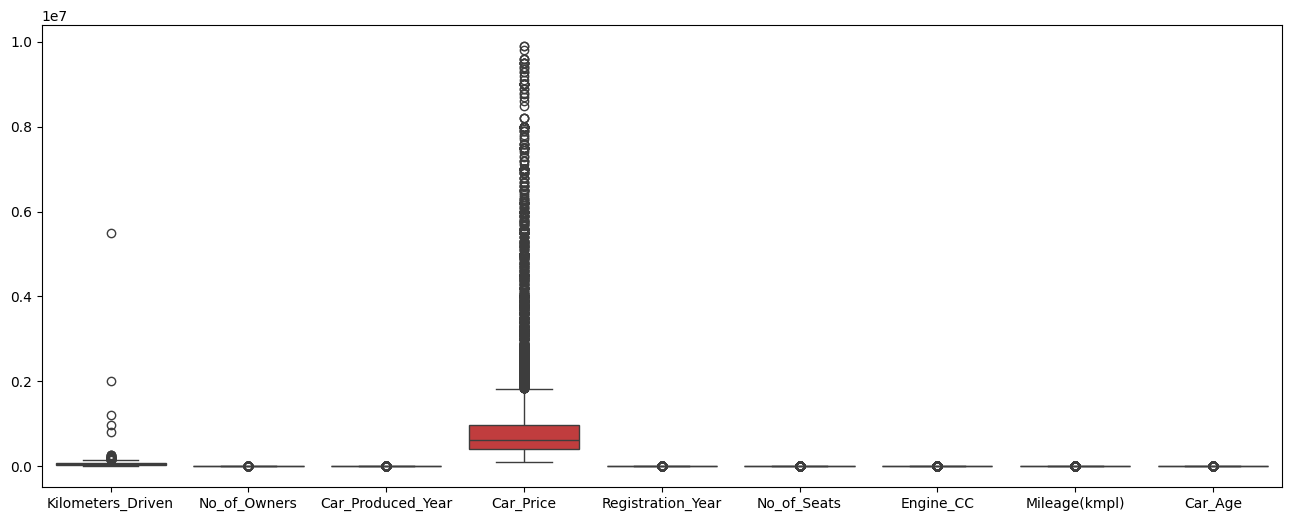

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data)
plt.show()

Kilometers_Driven


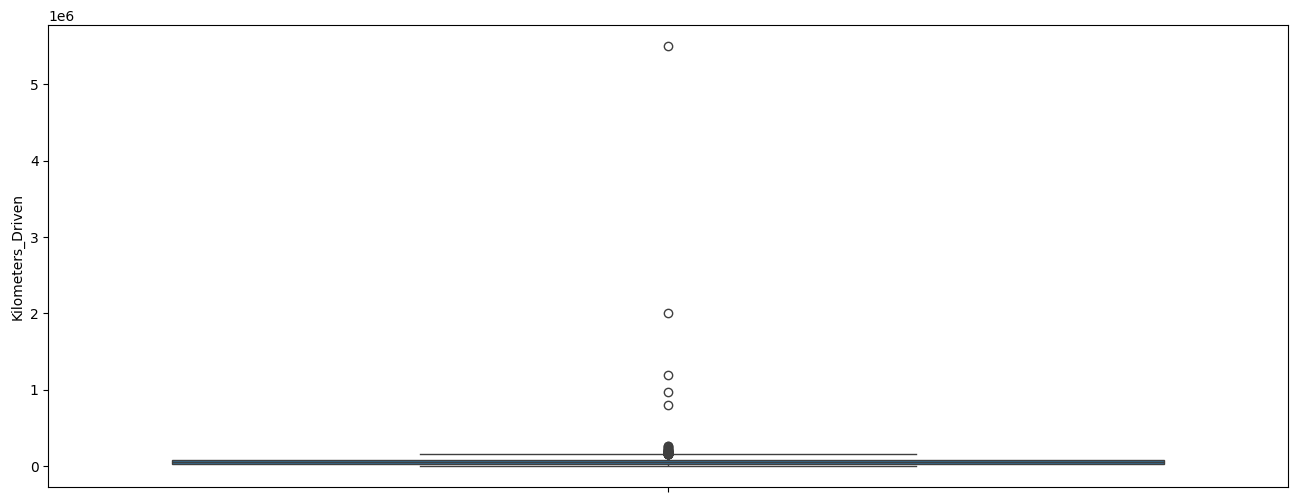

No_of_Owners


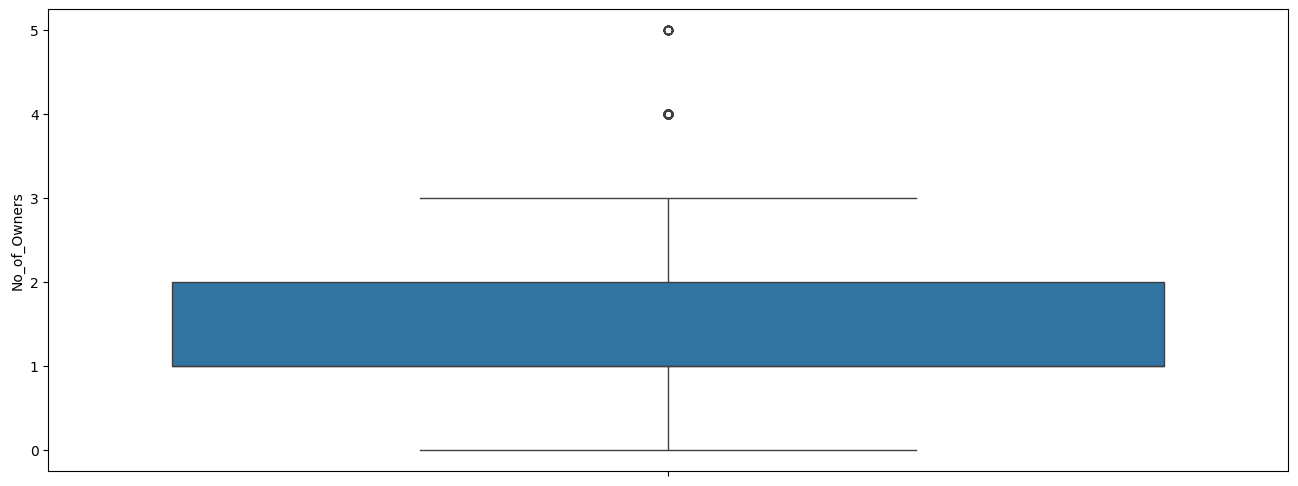

Car_Produced_Year


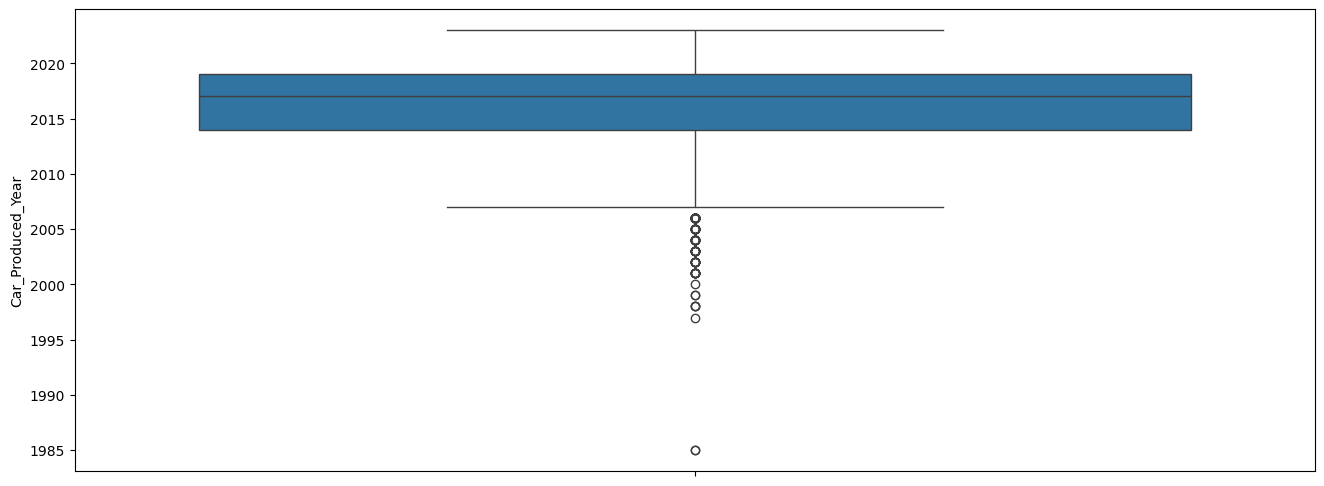

Car_Price


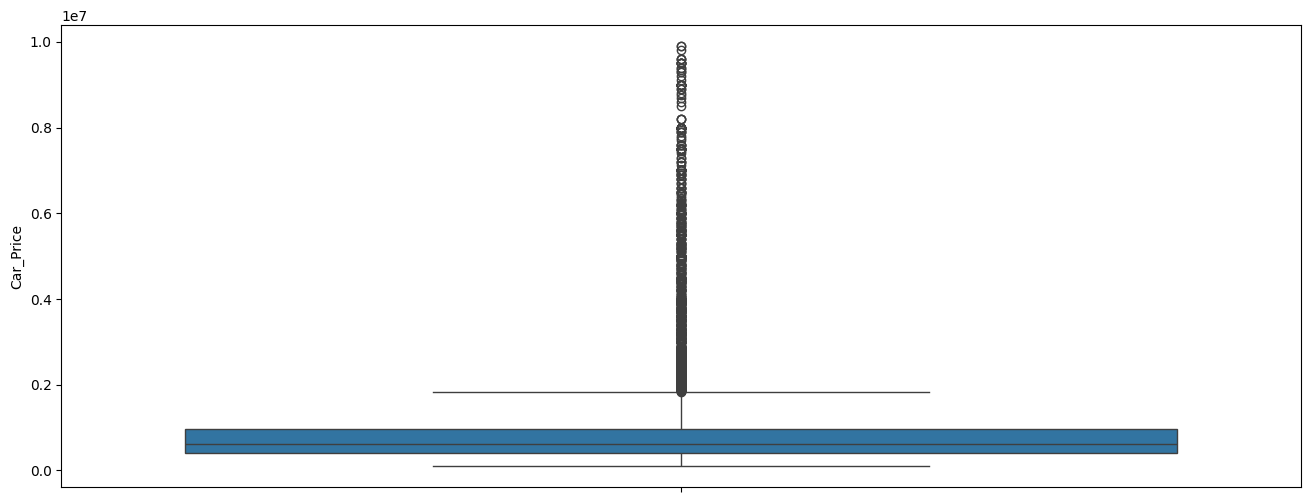

Registration_Year


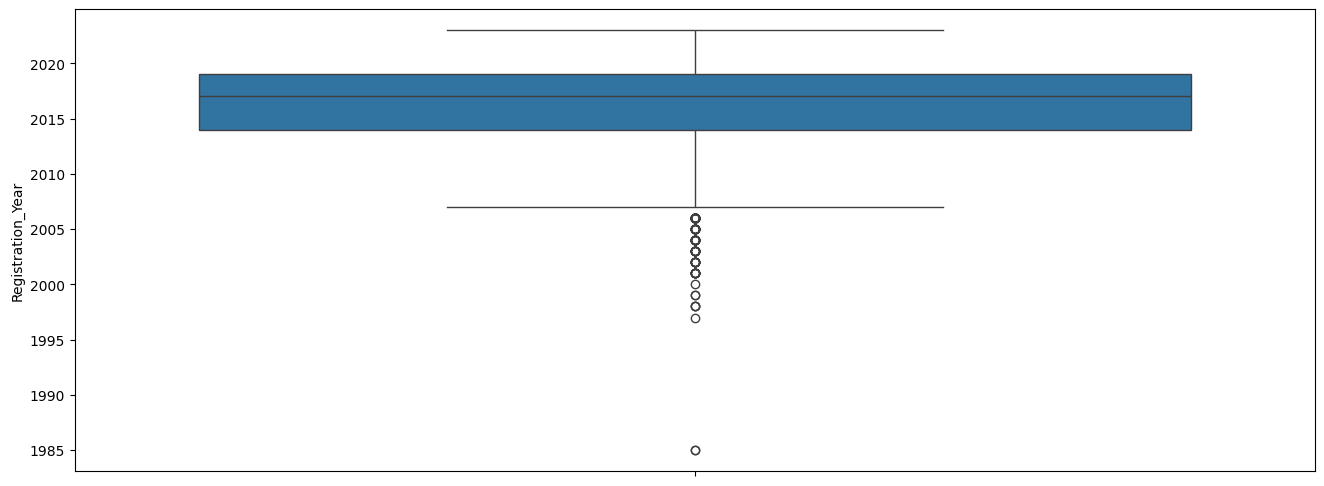

No_of_Seats


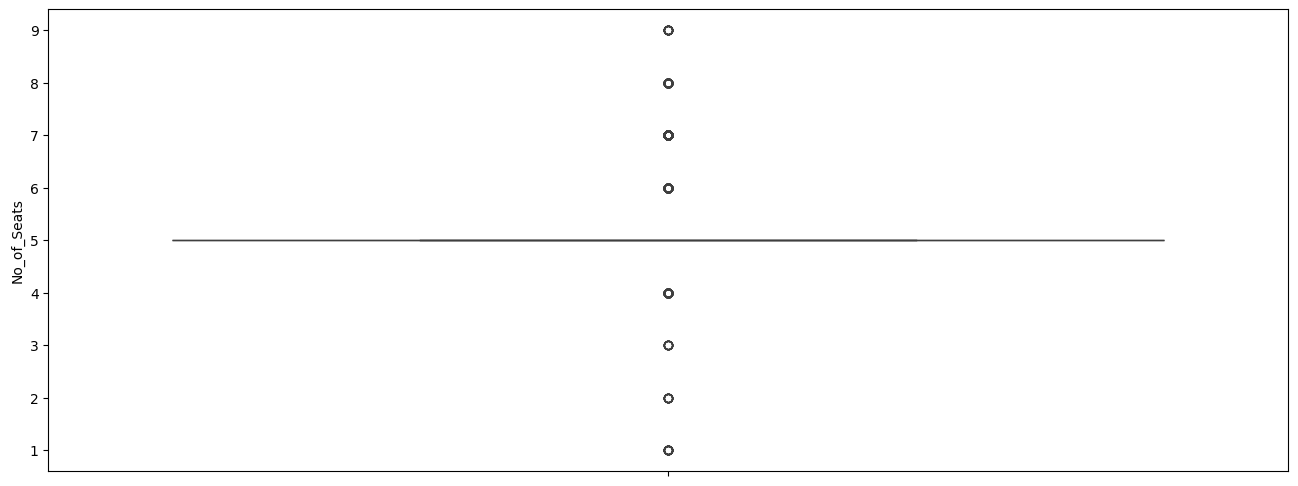

Engine_CC


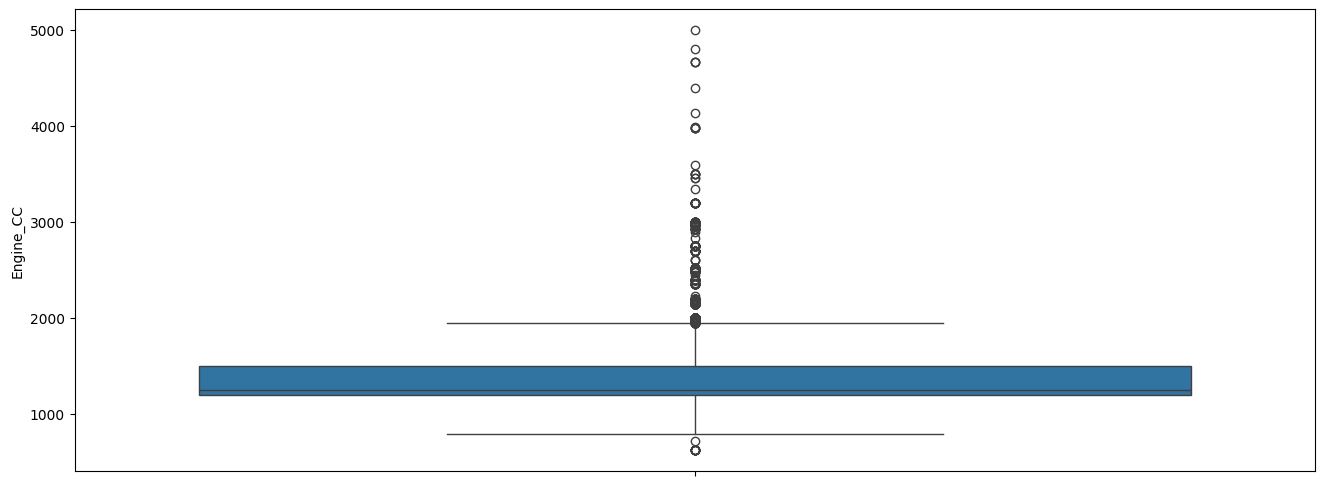

Mileage(kmpl)


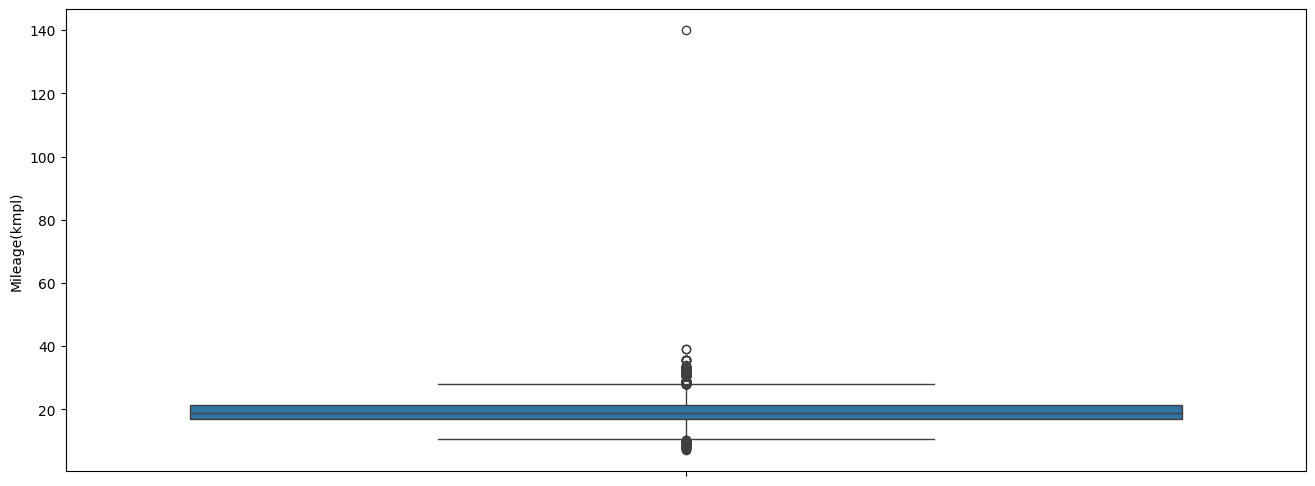

Car_Age


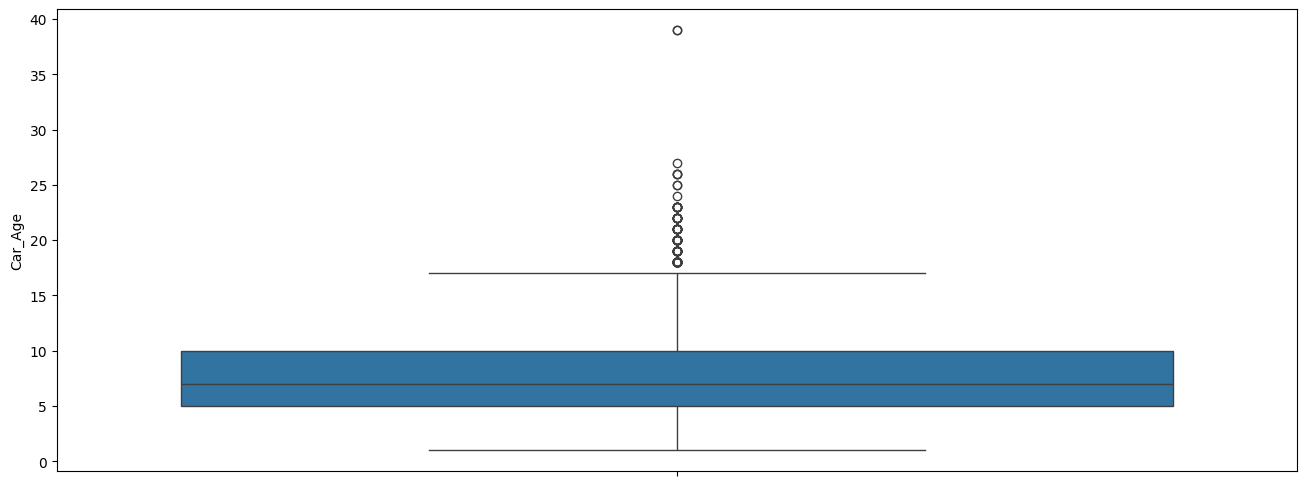

In [ ]:
for i in data.columns:
    if data[i].dtype != 'object':
        print(i)
        plt.figure(figsize=(16,6))
        sns.boxplot(data=data[i])
        plt.show()

In [ ]:
price = data[(data['Car_Produced_Year']<2009)&(data['Car_Price']>1000000)&(data['Manufactured_By']!= 'BMW')]
data.drop(price.index, inplace = True)

In [ ]:
data.to_csv('Cleaned_Car_Dheko.csv', index = False)

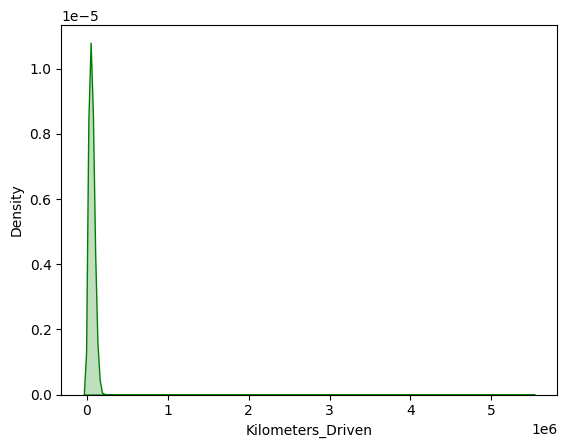

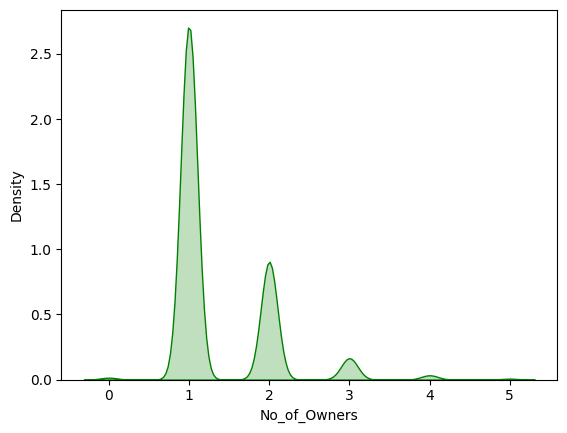

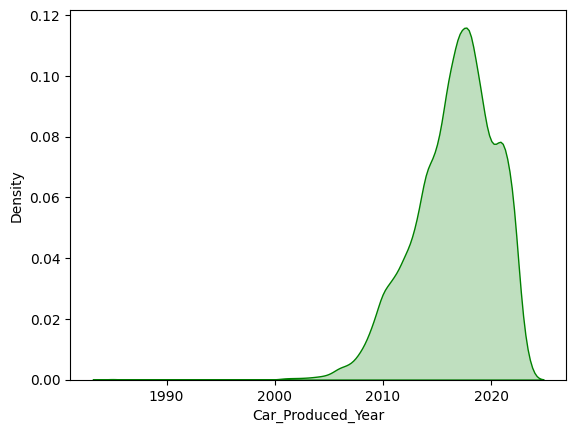

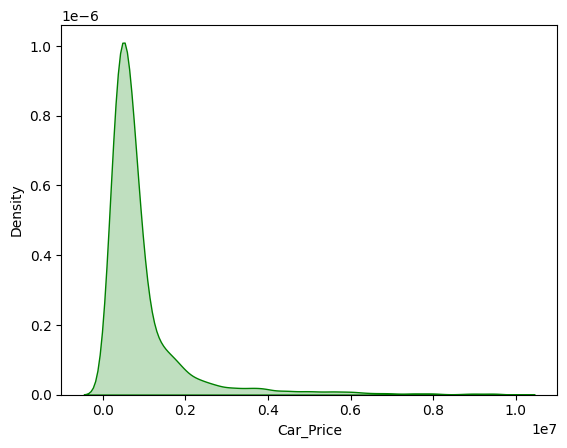

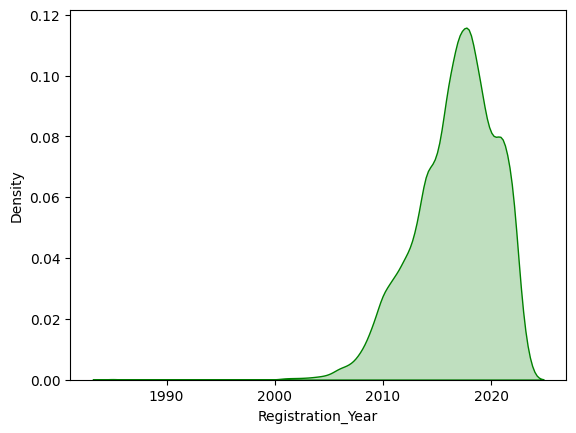

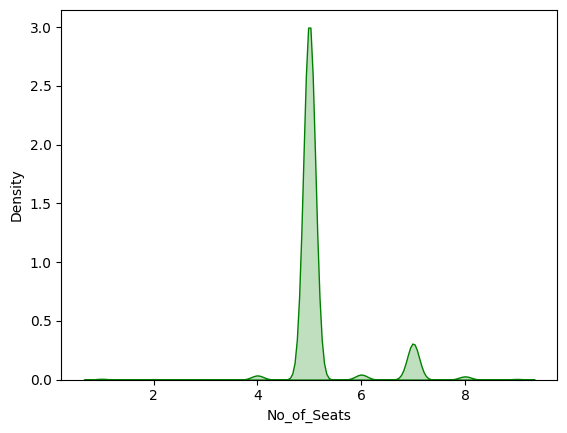

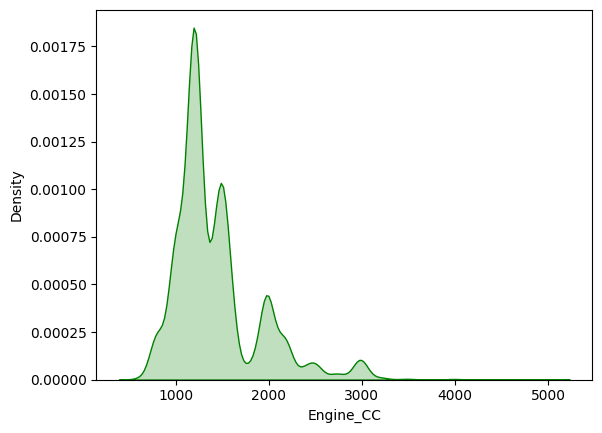

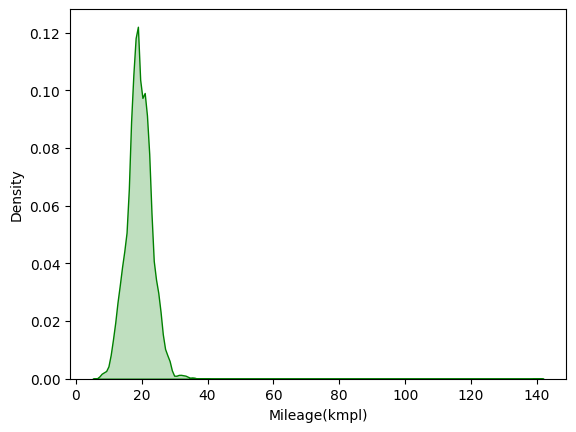

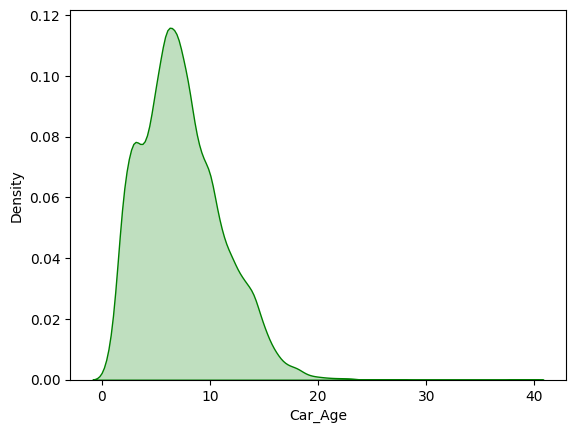

In [ ]:
for i in data.columns:
    if data[i].dtype != 'object' :
        sns.kdeplot(data=data[i],fill=True,color="g")
        plt.show()

In [ ]:
def inv_trans(x):
    if x!=0:
        return 1/x
    else:
        return 0

# data = data_3.copy()
data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(inv_trans)


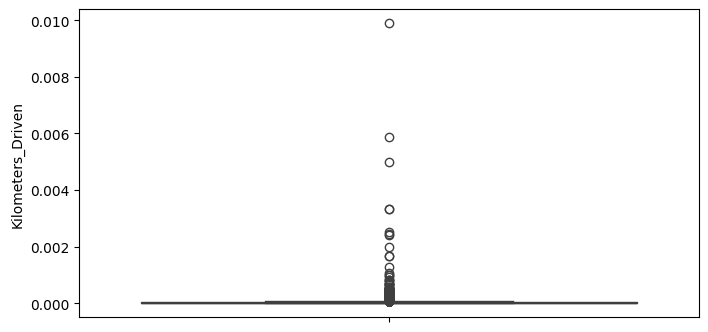

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=data['Kilometers_Driven'])
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        col_name = i
        data[i] = enc.fit_transform(data[[i]])
        encode = data[i].sort_values().unique() # 0.0,1.0,2.0 - this is encoded value
        globals()[col_name] = {}
        decoded_data = enc.inverse_transform(data[[i]])
        decoded = sorted(np.unique(decoded_data)) # original value of dataframe - like decoded value
        globals()[i] = dict(zip(decoded, encode))

In [ ]:
Location

{'Bangalore': np.float64(0.0),
 'Chennai': np.float64(1.0),
 'Hyderabad': np.float64(2.0),
 'Jaipur': np.float64(3.0),
 'Kolkata': np.float64(4.0),
 'delhi': np.float64(5.0)}

In [ ]:
data.to_csv('Preprocessed_Car_Dheko.csv', index = False)

In [ ]:
df = pd.read_csv('Preprocessed_Car_Dheko.csv')

In [ ]:
continuous = df[['Kilometers_Driven','No_of_Owners','Car_Produced_Year','Car_Price','Registration_Year','No_of_Seats','Engine_CC','Mileage(kmpl)','Car_Age']]
categorical = df[['Fuel_Type','Transmission_Type','Manufactured_By','Car_Model','Location']]

<Axes: >

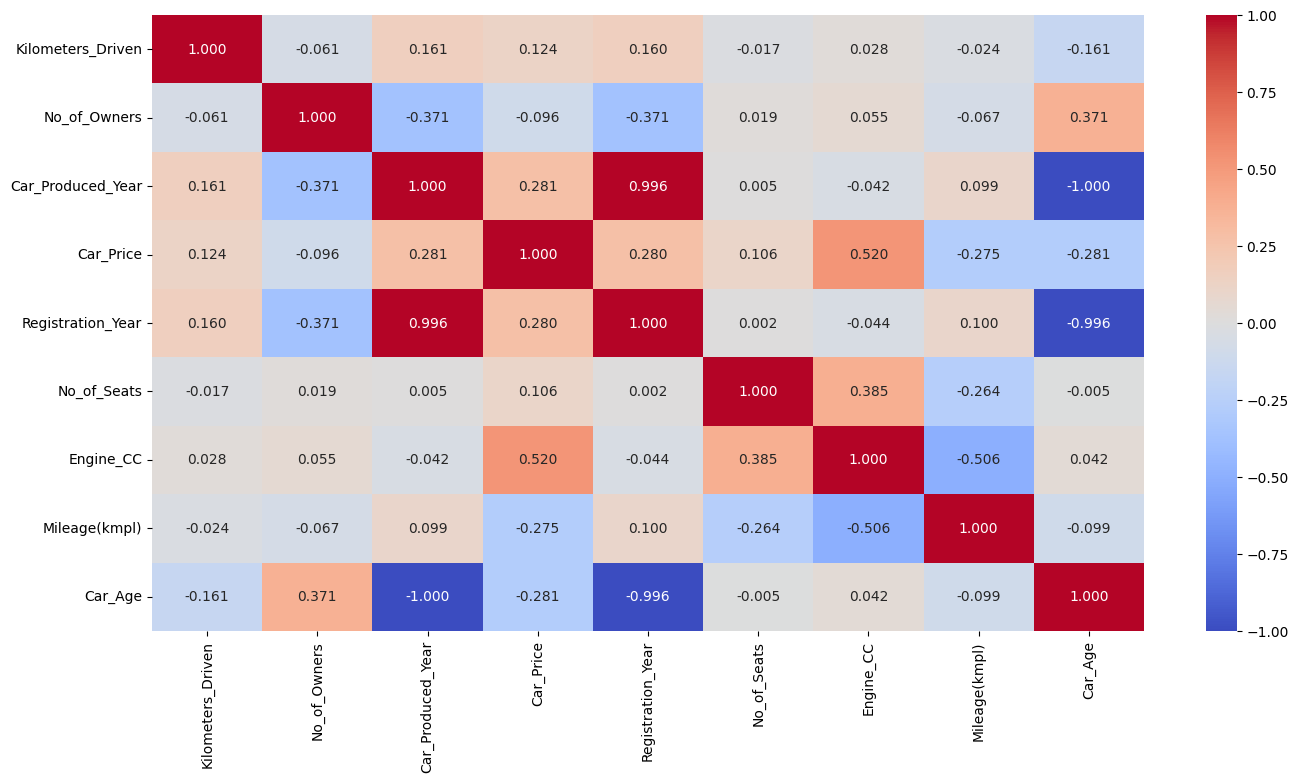

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(),annot=True,cmap="coolwarm",fmt=".3f")

In [ ]:
df.drop(df[['Registration_Year','Car_Age']], axis = 1, inplace = True)

In [ ]:
# checking hypothesis testing categorical column to categorical column
from scipy.stats import chi2_contingency

for i in categorical:
    for j in categorical:
        contingency_table = pd.crosstab(df[i], df[j])
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        print(i,j,p_value)

Fuel_Type Fuel_Type 0.0
Fuel_Type Transmission_Type 9.931466105274275e-24
Fuel_Type Manufactured_By 0.0
Fuel_Type Car_Model 0.0
Fuel_Type Location 4.620896106652552e-36
Transmission_Type Fuel_Type 9.931466105274345e-24
Transmission_Type Transmission_Type 0.0
Transmission_Type Manufactured_By 0.0
Transmission_Type Car_Model 0.0
Transmission_Type Location 7.297526503780431e-33
Manufactured_By Fuel_Type 0.0
Manufactured_By Transmission_Type 0.0
Manufactured_By Manufactured_By 0.0
Manufactured_By Car_Model 0.0
Manufactured_By Location 7.677307698217124e-36
Car_Model Fuel_Type 0.0
Car_Model Transmission_Type 0.0
Car_Model Manufactured_By 0.0
Car_Model Car_Model 0.0
Car_Model Location 3.874836756187625e-49
Location Fuel_Type 4.620896106652487e-36
Location Transmission_Type 7.297526503780431e-33
Location Manufactured_By 7.677307698217124e-36
Location Car_Model 3.8748367561876275e-49
Location Location 0.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
features = df.drop('Car_Price',axis = 1)
target = df['Car_Price']

In [ ]:
model = RandomForestRegressor(n_estimators=20,random_state=40)
model.fit(features,target)

RandomForestRegressor(n_estimators=20, random_state=40)

In [ ]:
model.feature_importances_

array([0.00736631, 0.06553113, 0.09088461, 0.01305019, 0.01965183,
       0.05213868, 0.18270979, 0.01541055, 0.46095474, 0.06280181,
       0.02950038])

In [ ]:
feature_importance = pd.DataFrame({
    "column": features.columns,
    "Score": model.feature_importances_ *100
}).sort_values('Score',ascending=False)#.head(12).column.values
feature_importance

,column,Score
8,Engine_CC,46.095474
6,Car_Produced_Year,18.270979
2,Transmission_Type,9.088461
1,Kilometers_Driven,6.553113
9,Mileage(kmpl),6.280181
5,Car_Model,5.213868
10,Location,2.950038
4,Manufactured_By,1.965183
7,No_of_Seats,1.541055
3,No_of_Owners,1.305019


In [ ]:
x = df.drop(['Car_Price','Manufactured_By','No_of_Seats','Fuel_Type','No_of_Owners'],axis = 1)
y = df['Car_Price']
print(x.shape)
x

(8135, 7)


,Kilometers_Driven,Transmission_Type,Car_Model,Car_Produced_Year,Engine_CC,Mileage(kmpl),Location
0,0.000014,0.0,264.0,2014,2494,19.16,4.0
1,0.000042,1.0,38.0,2017,799,22.70,4.0
2,0.000141,0.0,229.0,2021,999,19.03,4.0
3,0.000014,1.0,88.0,2011,1197,17.00,4.0
4,0.000020,0.0,7.0,2014,1968,15.73,4.0
...,...,...,...,...,...,...,...
8130,0.000017,0.0,62.0,2019,1497,18.00,5.0
8131,0.000050,1.0,106.0,2021,1197,18.40,5.0
8132,0.000017,1.0,84.0,2011,1591,17.01,5.0
8133,0.000026,1.0,72.0,2019,1582,20.50,5.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 50)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6508, 7), (1627, 7), (6508,), (1627,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 400, min_samples_split = 10, min_samples_leaf = 7, random_state=50)
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=400, min_samples_leaf=7, min_samples_split=10,
                      random_state=50)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

y_pred_test = model_DT.predict(x_test)
y_pred_train = model_DT.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

166162.13915753714
225457.6353988155
0.8015399786821148
0.6847201273152801


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model_kn = KNeighborsRegressor(n_neighbors = 4)
model_kn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
y_pred_test = model_kn.predict(x_test)
y_pred_train = model_kn.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

146270.74370006146
194894.74492931776
0.8241601267555955
0.7249423656995291


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
model_ada = AdaBoostRegressor(n_estimators=1000, learning_rate=0.001)
model_ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.001, n_estimators=1000)

In [ ]:
y_pred_test = model_ada.predict(x_test)
y_pred_train = model_ada.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

378277.58913016523
370342.1735860831
0.5544115796430362
0.5520993292238425


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(criterion = 'squared_error',n_estimators=700 ,max_depth = 25, min_samples_split = 7, min_samples_leaf = 5, random_state=50)
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=7,
                      n_estimators=700, random_state=50)

In [ ]:
y_pred_test = model_RF.predict(x_test)
y_pred_train = model_RF.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

153850.83372148845
195033.5237059454
0.8259284497927384
0.7558331285192089


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_GB = GradientBoostingRegressor(n_estimators=400, max_depth=10, min_samples_split=7, learning_rate=0.01)
model_GB.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_split=7,
                          n_estimators=400)

In [ ]:
y_pred_test = model_GB.predict(x_test)
y_pred_train = model_GB.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

71983.0186963742
181391.55697752282
0.9781278357178258
0.7311156455354499


In [ ]:
import pickle

with open('GradientBoost_model.pkl', 'wb') as file:
    pickle.dump(model_GB,file)

In [ ]:
import pickle

with open('RandomForest_model.pkl', 'wb') as file:
    pickle.dump(model_RF,file)

In [ ]:
%%writefile app.pyy
import streamlit as st
import pickle
import numpy as np
import pandas as pd

# Load the trained model
with open('GradientBoost_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Define the inverse transformation function
def inv_trans(x):
    if x != 0:
        return 1/x
    else:
        return 0

# Define the columns used for training
# Assuming the order of columns is the same as when training the model
# x = df.drop(['Car_Price','Manufactured_By','No_of_Seats','Fuel_Type','No_of_Owners'],axis = 1)
feature_columns = ['Kilometers_Driven', 'Transmission_Type', 'Car_Model', 'Car_Produced_Year', 'Engine_CC', 'Mileage(kmpl)', 'Location']

# Create dictionaries for categorical feature mapping
# These dictionaries were created in cell 2f9da81e
fuel_type_map = {'Cng': 0.0, 'Diesel': 1.0, 'Electric': 2.0, 'Lpg': 3.0, 'Petrol': 4.0}
transmission_type_map = {'Automatic': 0.0, 'Manual': 1.0}
manufactured_by_map = {'Audi': 0.0, 'BMW': 1.0, 'Chevrolet': 2.0, 'Citroen': 3.0, 'Datsun': 4.0, 'Fiat': 5.0, 'Ford': 6.0, 'Hindustan Motors': 7.0, 'Honda': 8.0, 'Hyundai': 9.0, 'Isuzu': 10.0, 'Jaguar': 11.0, 'Jeep': 12.0, 'Kia': 13.0, 'Land Rover': 14.0, 'Lexus': 15.0, 'MG': 16.0, 'Mahindra': 17.0, 'Mahindra Renault': 18.0, 'Mahindra Ssangyong': 19.0, 'Maruti': 20.0, 'Mercedes-Benz': 21.0, 'Mini': 22.0, 'Mitsubishi': 23.0, 'Nissan': 24.0, 'Porsche': 25.0, 'Renault': 26.0, 'Skoda': 27.0, 'Tata': 28.0, 'Toyota': 29.0, 'Volkswagen': 30.0, 'Volvo': 31.0}
car_model_map = Car_Model # This variable was created in cell 2f9da81e
location_map = Location # This variable was created in cell 2f9da81e

st.title('Used Car Price Prediction')

st.header('Enter Car Details:')

# Get user input for each feature
fuel_type = st.selectbox('Fuel Type', list(fuel_type_map.keys()))
kilometers_driven = st.number_input('Kilometers Driven', min_value=0)
transmission_type = st.selectbox('Transmission Type', list(transmission_type_map.keys()))
manufactured_by = st.selectbox('Manufactured By', list(manufactured_by_map.keys()))
car_model = st.selectbox('Car Model', list(car_model_map.keys()))
car_produced_year = st.number_input('Car Produced Year', min_value=1980, max_value=2024, step=1)
no_of_seats = st.number_input('Number of Seats', min_value=1, max_value=10, step=1)
engine_cc = st.number_input('Engine CC', min_value=0)
mileage_kmpl = st.number_input('Mileage (kmpl)', min_value=0.0)
location = st.selectbox('Location', list(location_map.keys()))
no_of_owners = st.number_input('Number of Owners', min_value=0, step=1)
# car_age = 2024 - car_produced_year # Car Age is calculated internally if needed

# Prepare input data for the model (matching the training data format)
# Note: 'Manufactured_By', 'No_of_Seats', 'Fuel_Type', 'No_of_Owners' were dropped
# 'Registration_Year' and 'Car_Age' were also dropped

input_data = {
    'Kilometers_Driven': inv_trans(kilometers_driven),
    'Transmission_Type': transmission_type_map[transmission_type],
    'Car_Model': car_model_map[car_model],
    'Car_Produced_Year': car_produced_year,
    'Engine_CC': engine_cc,
    'Mileage(kmpl)': mileage_kmpl,
    'Location': location_map[location],
}

input_df = pd.DataFrame([input_data])

# Reorder columns to match training data
input_df = input_df[feature_columns]


if st.button('Predict Price'):
    try:
        prediction = model.predict(input_df)
        st.success(f'Predicted Car Price: ₹ {prediction[0]:,.2f}')
    except Exception as e:
        st.error(f"An error occurred during prediction: {e}")

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501


/bin/bash: line 1: streamlit: command not found
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇your url is: https://common-views-tap.loca.lt
y
